In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from statistics import mean
from functools import reduce
import math

In [2]:
file = pd.ExcelFile("data.xlsx")

In [3]:
U = file.parse(sheet_name = 'Лист1', header=0, usecols='A').values.flatten() #мВ
U_error = 0.1 #мВ
l = file.parse(sheet_name = 'Лист1', header=0, usecols='B').values.flatten() #мм
l_error = 0.02 #мм

Строим зависимость U(l)

[-1.28571429 10.91047619]


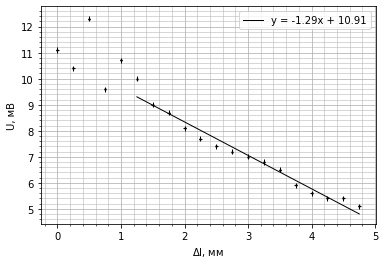

In [4]:
fig, ax = plt.subplots()

plt.scatter(l, U, color = 'black', s = 2)
plt.errorbar(l, U, yerr = U_error, xerr = l_error,fmt='none',ecolor = 'black',elinewidth = 1)

z = np.polyfit(l[5:], U[5:], 1)
f = np.poly1d(z)
l_new = np.linspace(l[5], l[-1], 100)
U_new = f(l_new)

print(f.c) 

plt.plot(l_new, U_new, linewidth = 1, color = "black", label = 'y = -1.29x + 10.91')

plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('U, мВ')
ax.set_xlabel('$\Delta$l, мм')
plt.legend()
plt.show()
fig.savefig('U(l).png', dpi = 1000)

In [5]:
#погрешность по МНК
def Dii(a):
    d = 0
    avg = reduce(lambda x, y: x + y, a) /len(a)
    for i in range(len(a)):
        d += (a[i] - avg)**2
    return d/len(a)

def sigma_b(x, sigmak):
    b = 0
    for i in range(len(x)):
        b += x[i]**2
    return sigmak*np.sqrt(b/len(x))

def sigma_k(x, y, k):
    return np.sqrt(abs(Dii(y)/Dii(x) - (k)**2)/(len(x)-2))


s_k = sigma_k(l[5:], U[5:], f.c[0])
s_b = sigma_b(U, s_k)

print('k =', f.c[0], 'sigma_k =', s_k)
print('b =', f.c[1], 'sigma_b =', s_b)

k = -1.2857142857142863 sigma_k = 0.06658917526662714
b = 10.910476190476196 sigma_b = 0.5502156007657364


Считаем удельное сопротивление

In [6]:
ro = abs(f.c[0])*3.14*6**2/(4*0.075) #10^(-3) Ом*мм
ro_error = 3.14*6**2/4*((abs(s_k)/0.075)**2+(abs(s_k)*0.001/0.075**2)**2)**(1/2)
print(ro)
print(ro_error)

484.45714285714314
25.093031434793364
